# **Fast Walsh Hadamard Transform**

### **SAMPLING**

In [2]:
# import sympy 
from sympy import fwht
  
# sequence 
seq = [23, 
       56, 
       12, 
       555]
  
# hwht
transform = fwht(seq)
print ("Transform  : ", transform)

Transform  :  [646, -576, -488, 510]


### **Importing libraries**

In [3]:
import cv2
import pandas as pd
import numpy as np
import math
from google.colab.patches import cv2_imshow

### **Read a image and convert them to grayscale**

In [4]:
img = cv2.imread('/content/testt.png')

In [5]:
img.shape

(320, 320, 3)

In [6]:
r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

In [7]:
print(gray)

[[157.9842 182.9817 174.9825 ... 173.9826 219.978  141.9858]
 [112.9887 134.9865 206.9793 ... 178.9821 116.9883 107.9892]
 [198.9801 169.983  164.9835 ... 177.9822 190.9809 180.9819]
 ...
 [ 57.9942  22.9977  29.997  ...  53.9946  92.9907  97.9902]
 [ 58.9941  36.9963  47.9952 ... 105.9894  96.9903 115.9884]
 [ 26.9973  50.9949  46.9953 ...  71.9928  63.9936 165.9834]]


In [8]:
gray.shape

(320, 320)

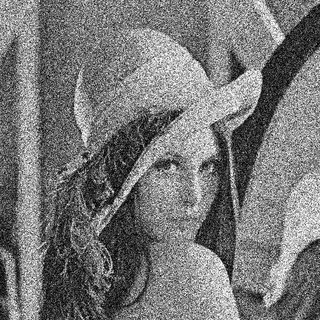

In [9]:
cv2_imshow(gray)

### **Transformation**

In [13]:
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
converted = 20*np.log((fshift))

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


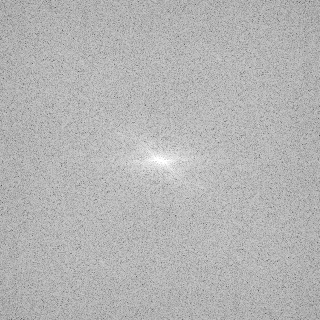

In [14]:
cv2_imshow(converted)

### **Low pass filters**

In [15]:
lowpass = np.zeros((320,320))
radius = 150
for i in range(320):
  for j in range(320):
    if(i>100 and i<220 and j>100 and j<220):
      lowpass[i][j] = 255
    else:
      lowpass[i][j] = 0

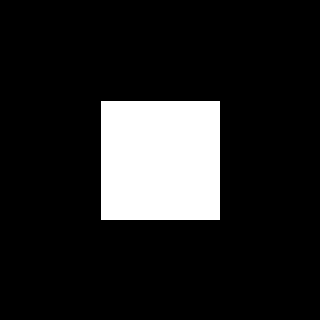

In [16]:
cv2_imshow(lowpass)

### **Multiplying Lowpass to the transformed image**

In [17]:
transformed = converted*(lowpass/255)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


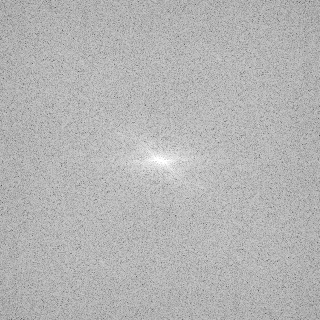

In [18]:
cv2_imshow(converted)

### **Inverse Transform**

In [19]:
transformed = np.exp(transformed/20)
inv = np.fft.ifftshift(transformed)
inverted = np.fft.ifft2(inv)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


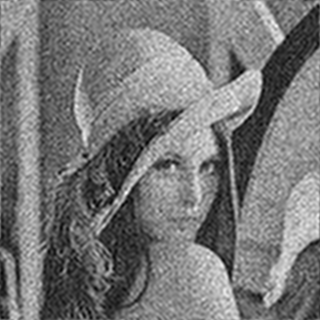

In [20]:
cv2_imshow(inverted)

### **High pass filters**

In [21]:
highpass = np.zeros((320,320))
radius = 150
for i in range(320):
  for j in range(320):
    if(i>130 and i<190 and j>130 and j<190):
      highpass[i][j] = 0
    else:
      highpass[i][j] = 255

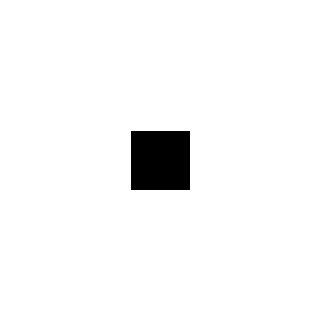

In [22]:
cv2_imshow(highpass)

### **Multiplying highpass filters with transformed images**

In [23]:
transformedh = converted*(highpass/255)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


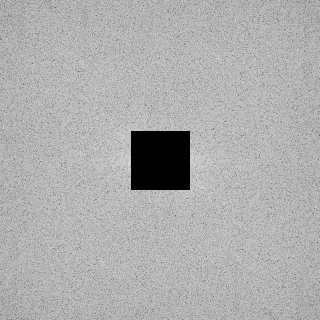

In [24]:
cv2_imshow(transformedh)

### **Inverse fourier transform**

In [25]:
transformedh = np.exp(transformedh/20)
inv = np.fft.ifftshift(transformedh)
inverted = np.fft.ifft2(inv)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


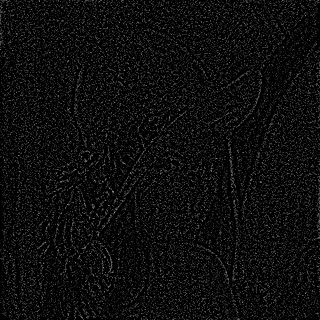

In [26]:
cv2_imshow(inverted)

## **SMOOTHENING OF A IMAGE**

### **Read images and convert into grayscale**

In [27]:
test = cv2.imread('/content/images.jpg')

In [28]:
test.shape

(168, 300, 3)

In [29]:
r, g, b = test[:,:,0], test[:,:,1], test[:,:,2]
testgray = 0.2989 * r + 0.5870 * g + 0.1140 * b

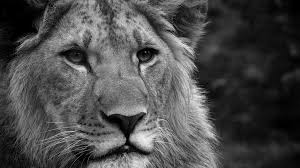

In [30]:
cv2_imshow(testgray)

In [31]:
testgray.shape

(168, 300)

### **Fourier transform**

In [32]:
f1 = np.fft.fft2(testgray)
fshift1 = np.fft.fftshift(f1)
testconverted = 20*np.log((fshift1))

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


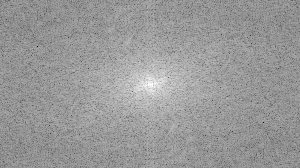

In [33]:
cv2_imshow(testconverted)

### **Lowpass filters**

In [34]:
lowpass = np.zeros((168,300))
radius = 150
for i in range(168):
  for j in range(300):
    if(i>44 and i<124 and j>120 and j<180):
      lowpass[i][j] = 255
    else:
      lowpass[i][j] = 0

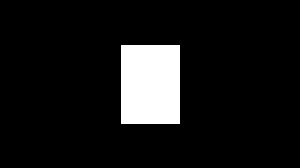

In [35]:
cv2_imshow(lowpass)

### **Multiplying lowpass filters to the transformed image**


In [36]:
transformed = testconverted*(lowpass/255)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


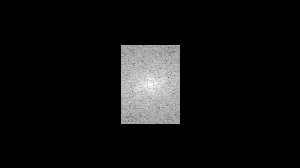

In [37]:
cv2_imshow(transformed)

### **Inverse fourier transform**

In [38]:
transformedh = np.exp(transformed/20)
inv = np.fft.ifftshift(transformedh)
inverted = np.fft.ifft2(inv)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


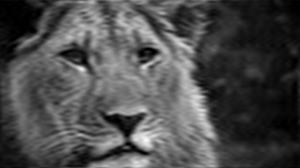

In [39]:
cv2_imshow(inverted)

## **SHARPENING OF A IMAGE**

### **High pass filters**

In [40]:
highpass = np.zeros((168,300))
radius = 150
for i in range(168):
  for j in range(300):
    if(i>74 and i<94 and j>140 and j<160):
      highpass[i][j] = 0
    else:
      highpass[i][j] = 255

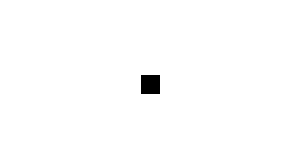

In [41]:
cv2_imshow(highpass)

### **Multiplying high pass filters to converted images**

In [42]:
transformed = testconverted*(highpass/255)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


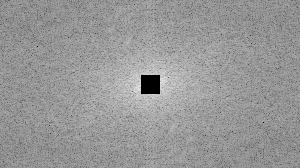

In [43]:
cv2_imshow(transformed)

### **Inverse transform**

In [44]:
transformedh = np.exp(transformed/20)
inv = np.fft.ifftshift(transformedh)
inverted = np.fft.ifft2(inv)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


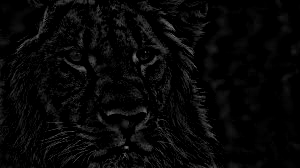

In [45]:
cv2_imshow(inverted)